# Ex. 1

Scrieţi un program în Python care să preia ca input un fişier .csv cu o listă oarecare şi să aibă ca output un număr predeterminat de elemente din acea listă, fără repetiţie. Aplicaţi pe lista studenţilor din grupa dumneavoastră care nu au prezentat încă o temă.

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
import os

In [63]:
def students_list_to_present_hw(file_path, sample_size):

    if not os.path.exists(file_path):
        raise FileNotFoundError(f"The file at {file_path} does not exist.")

    if sample_size < 0:
        raise ValueError("Sample size cannot be negative.")

    df = pd.read_csv(file_path)

    non_presented_df = df[df['Tema'] == 'Neprezentat']

    names_list = non_presented_df['Name'].tolist()

    if sample_size > len(names_list): # in case sample_size is too big
        sample_size = len(names_list)

    sample = np.random.choice(names_list, size=sample_size, replace=False)
    return sample

sample_csv_path = '/student_names.csv'
sample_size = 4
selected_students = students_list_to_present_hw(sample_csv_path, sample_size)

print(selected_students)

['IONESCU I. LUCA-DANIEL' 'CÎRSTEAN C.C. PAUL-IOAN'
 'PERJU C.C. RAREŞ-ANDREI' 'VARZAR M. ALINA-MIRUNA']


# Ex. 2

Doi prieteni joacă următorul joc, după următoarele reguli:

**Pasul 1.** Primul jucător aruncă cu o monedă.

- Dacă pică **stemă**, cel de-al doilea trebuie să arunce cu zarul şi să-i dea primului o sumă egală cu \( z - 3 \) $, unde \( z \) este rezultatul aruncării cu zarul (a da o sumă negativă este echivalent cu a lua opusul acelei sume). Jocul se încheie aici.

- Dacă pică **ban**, atunci primul jucător trebuie să-i dea celui de-al doilea 0.5 $.

**Pasul n.** În caz că jocul nu s-a încheiat, se reia pasul 1.

Astfel, jocul se opreşte la pasul corespunzător obţinerii **stemei** de către primul jucător.


a) Ce fel de distribuţie urmează N, numărul de paşi ai jocului?

**Distributie Geometrica**: variabila aleatoare 𝑁 reprezintă numărul de încercări până la primul succes într-o serie de experimente Bernoulli. În acest caz, "succesul" este evenimentul obținerii "stemei".

b) Simulaţi în Python un astfel de joc. Variabilele care ne interesează sunt N şi suma totală S pe care cel de-al doilea jucător trebuie să i-o dea primului.

In [74]:
def simulate_game(p_stema):
    S = 0
    N = 0

    while True:
        N += 1
        coin_flip = np.random.choice(['stema', 'ban'], p=[p_stema, 1-p_stema])

        if coin_flip == 'stema':
            die_roll = np.random.randint(1, 7)
            S += (die_roll - 3)
            break
        else:
            S -= 0.5

    return N, S

N, S = simulate_game(0.5)
print(f'N = {N}, S = {S}')

N = 5, S = 0.0


c) Prin simularea unui număr mare de astfel de jocuri, determinaţi cu aproximaţie media lui S şi reprezentaţi grafic (printr-o histogramă) distribuţia acesteia.

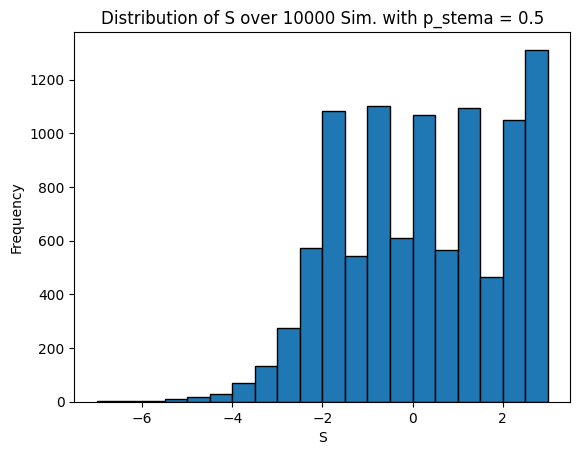

Mean = 0.01735


In [76]:
def simulate_multiple_games(num_sim, p_stema):
    results = []

    for _ in range(num_sim):
        _, S = simulate_game(p_stema)
        results.append(S)

    mean_S = np.mean(results)

    plt.hist(results, bins=20, edgecolor='black')
    plt.title(f'Distribution of S over {num_sim} Sim. with p_stema = {p_stema}')
    plt.xlabel('S')
    plt.ylabel('Frequency')
    plt.show()

    return mean_S

mean_S = simulate_multiple_games(10000, 0.5)
print(f'Mean = {mean_S}')

d) Ce se întâmplă dacă moneda este măsluită? Încercaţi să refaceţi pct. c) cu o probabilitate de apariţie a stemei
p = 0.3, respectiv p = 0.7.

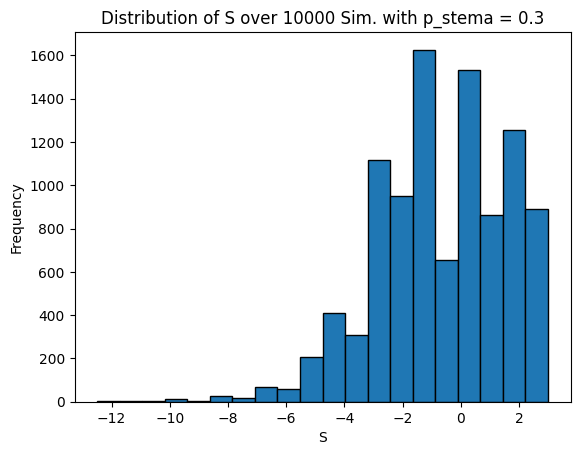

Mean = -0.65685


In [77]:
mean_S = simulate_multiple_games(10000, 0.3)
print(f'Mean = {mean_S}')

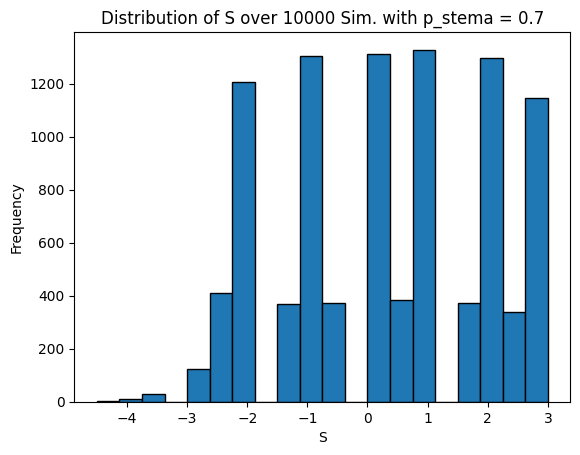

Mean = 0.2948


In [78]:
mean_S = simulate_multiple_games(10000, 0.7)
print(f'Mean = {mean_S}')

# Ex. 3

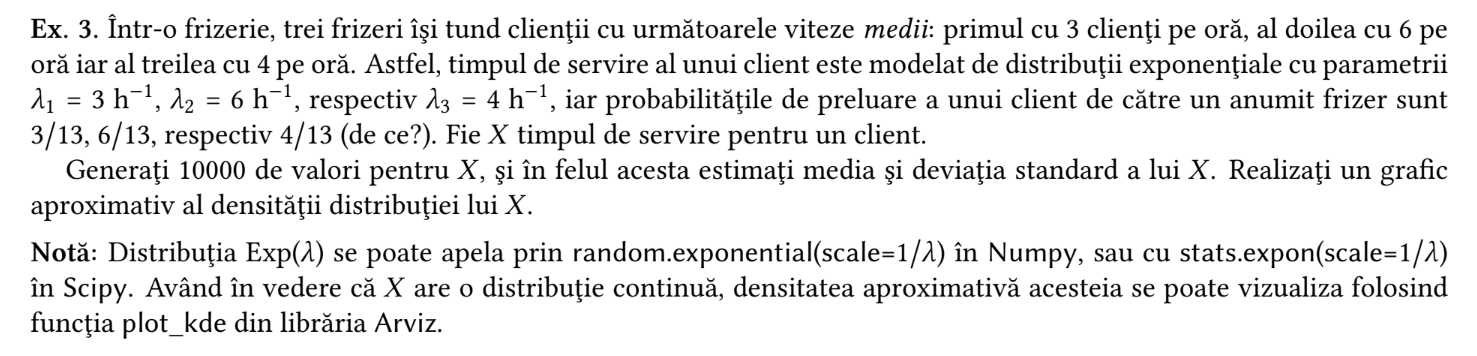

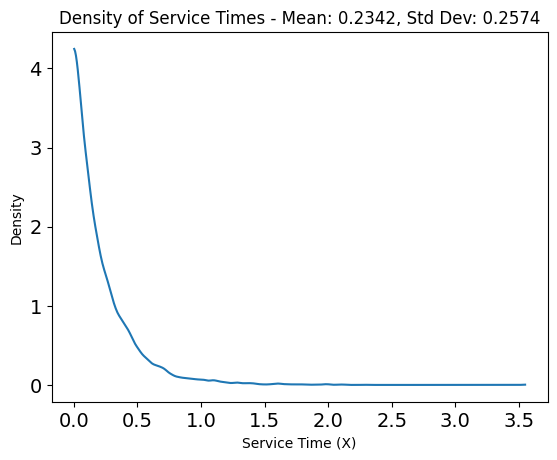

In [79]:
def generate_service_times(lambdas, probs, num_samples):
    service_times = []

    for _ in range(num_samples):
        chosen_lambda = np.random.choice(lambdas, p=probs)

        service_time = np.random.exponential(scale=1/chosen_lambda)
        service_times.append(service_time)

    return np.array(service_times)

num_samples = 10000
lambdas = [3, 6, 4]
probs = [3/13, 6/13, 4/13]
service_times = generate_service_times(lambdas, probs, num_samples)

mean_X = np.mean(service_times)
std_dev_X = np.std(service_times)

az.plot_kde(service_times)
plt.title(f'Density of Service Times - Mean: {mean_X:.4f}, Std Dev: {std_dev_X:.4f}')
plt.xlabel('Service Time (X)')
plt.ylabel('Density')
plt.show()